<a href="https://colab.research.google.com/github/saulo-bernardo/ml-cancer_pulmao/blob/main/Saulo_Bernardo_Projeto_Final_Python_Analise_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto: Previsão de Cancer de Pulmão**

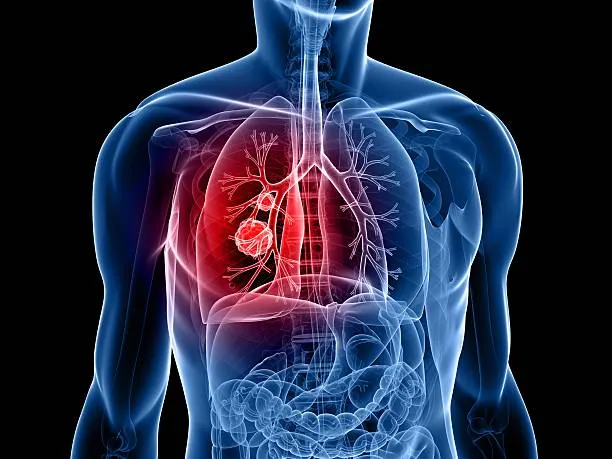

### **Objetivo do projeto**

O projeto tem o objetivo de criar um sistema eficaz de previsão de cancer de pulmão. O modelo criado deverá ter uma acurácia igual ou maior que **95%**, será usado o algoritmo de classificação **Random Forest**.

O modelo poderá ser usado para auxiliar os médicos à terem um pré diagnostico com baixo custo e também os ajudará a tomar decisões adequada com base no estado de risco de cancer do paciente.

A base de dados [Lung Cancer](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/) está disponível ao publíco no Kaggle.

A base de dados contém as seguintes informações em seus atributos:

|Variável|Valores|Descrição|
|---|---|---|
|Gender|M(masculino), F(feminino)|Classificação do genero.|
|Age|Idade do paciente|números inteiros|
|Smoking|YES=2, NO=1| booleano|
|Yellow fingers|YES=2 , NO=1|booleano|
|Anxiety|YES=2 , NO=1|booleano
|Peer_pressure|YES=2 , NO=1|booleano|
|Chronic Disease|YES=2 , NO=1|booleano|
|Fatigue|YES=2 , NO=1|booleano|
|Allergy|YES=2 , NO=1|booleano|
|Wheezing|YES=2 , NO=1|booleano|
|Alcohol|YES=2 , NO=1|booleano|
|Coughing|YES=2 , NO=1|booleano|
|Shortness of Breath|YES=2 , NO=1|booleano|
|Swallowing Difficulty|YES=2 , NO=1|booleano|
|Chest pain|YES=2 , NO=1|booleano|
|Lung Cancer|YES, NO|YES para com cancer e NO para sem cancer|

### **Metodologia**

O processo de desenvolvimento conta com os seguintes passos:

1. **Análise descritiva com ETL (Extract, Transform, Load)**:
  - [x] Extract: Extração dos dados da plataforma kaggle;
  - [x] Transform: Transformação dos dados;
  - [x] Load: Utilização dos dados em análise descritiva e modelagem preditiva.

2. **Modelagem Preditiva**:
  - [x] Pré processamento dos dados;
  - [x] Treinamento do modelo de machine learning;
  - [x] Seleção de hiperparâmetros;
  - [x] Avaliação do modelo de machine learning.


  **Equipe:**
- Antônio Nunes
- Jonatha Weydson
- Sanderson Rhawan
- Saulo Bernardo
- Washington França
- Williams Alves

## Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

## Ingestão de Dados

Nesta seção iremos carregar os dados para iniciar nosso projeto.

In [ ]:
# Carregando base de dados
df = pd.read_csv('survey_lung_cancer.csv')

## Exploração e Tratamento da Base de Dados

Aqui vamos realizar uma exploração inicial dos dados e realizar alterações para facilitar nossas análises.

In [ ]:
# Visualizando as cinco primeiras linhas
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Dimensões do dataset
df.shape

(309, 16)

In [ ]:
# Informações dos dados do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# Verificando presença de dados nulos
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
# Visualizando títulos das colunas
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
# Renomendo títulos das colunas
colunas = ['genero', 'idade', 'fumante', 'dedos_amarelos', 'ansiedade',
       'fumante_passivo', 'doenca_cronica', 'fadiga', 'alergia', 'chiado_respiracao',
       'consome_alcool', 'tosse', 'falta_de_ar',
       'dificuldade_engolir', 'dores_peito', 'cancer_pulmao']

df = df.rename(columns=dict(zip(df.columns, colunas)))

# Verificando
df.columns

Index(['genero', 'idade', 'fumante', 'dedos_amarelos', 'ansiedade',
       'fumante_passivo', 'doenca_cronica', 'fadiga', 'alergia',
       'chiado_respiracao', 'consome_alcool', 'tosse', 'falta_de_ar',
       'dificuldade_engolir', 'dores_peito', 'cancer_pulmao'],
      dtype='object')

In [ ]:
df['genero'] = df['genero'].map({'M': "Masculino", 'F': "Feminino"})
df['fumante'] = df['fumante'].map({2: "Sim", 1: "Não"})
df['dedos_amarelos'] = df['dedos_amarelos'].map({2: "Sim", 1: "Não"})
df['ansiedade'] = df['ansiedade'].map({2: "Sim", 1: "Não"})
df['fumante_passivo'] = df['fumante_passivo'].map({2: "Sim", 1: "Não"})
df['doenca_cronica'] = df['doenca_cronica'].map({2: "Sim", 1: "Não"})
df['fadiga'] = df['fadiga'].map({2: "Sim", 1: "Não"})
df['alergia'] = df['alergia'].map({2: "Sim", 1: "Não"})
df['chiado_respiracao'] = df['chiado_respiracao'].map({2: "Sim", 1: "Não"})
df['consome_alcool'] = df['consome_alcool'].map({2: "Sim", 1: "Não"})
df['tosse'] = df['tosse'].map({2: "Sim", 1: "Não"})
df['falta_de_ar'] = df['falta_de_ar'].map({2: "Sim", 1: "Não"})
df['dificuldade_engolir'] = df['dificuldade_engolir'].map({2: "Sim", 1: "Não"})
df['dores_peito'] = df['dores_peito'].map({2: "Sim", 1: "Não"})
df['cancer_pulmao'] = df['cancer_pulmao'].map({"YES": "Sim", "NO": "Não"})

In [ ]:
# Visualizando dataset
df.head()

,genero,idade,fumante,dedos_amarelos,ansiedade,fumante_passivo,doenca_cronica,fadiga,alergia,chiado_respiracao,consome_alcool,tosse,falta_de_ar,dificuldade_engolir,dores_peito,cancer_pulmao
0,Masculino,69,Não,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,Masculino,74,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Sim
2,Feminino,59,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Sim,Sim,Não,Sim,Não
3,Masculino,63,Sim,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,Não,Sim,Sim,Não
4,Feminino,63,Não,Sim,Não,Não,Não,Não,Não,Sim,Não,Sim,Sim,Não,Não,Não


**Observações e alterações:**
- O dataset contém 309 linhas e 16 colunas;
- A base não continha problemas de valores faltantes ou de tipo dos dados;
- O título das colunas foram traduzidas e padronizadas para o padrão snake case;
- Alteração nos dados da coluna 'genero', os gêneros estavam abreviados, para deixar a análise mais clara foi definido que usariamos a palavra que denomina cada gênero, sem abreviações;
- Alteração nas variáveis numéricas, substituindo os valores booleanos que eram 1 e 2 por 'Não' e 'Sim', respectivamente;
- Tradução dos dados da coluna 'cancer_pulmao'.

## Análise Descritiva

### Estatística geral da base de dados

In [ ]:
# Estatística dados numéricos
df.describe()

,idade
count,309.000000
mean,62.673139
std,8.210301
min,21.000000
25%,57.000000
50%,62.000000
75%,69.000000
max,87.000000


A amostra possui uma variação considerável de idades, com uma média e mediana em torno de 62 anos, sugerindo que a maior parte dos indivíduos está na faixa dos 60 anos. A presença de idades tão variadas pode indicar uma população com diferentes estágios de vida ou diferentes coortes etárias. A análise da dispersão e dos percentis pode ajudar a entender melhor a distribuição etária e a planejar intervenções ou políticas que considerem a diversidade etária da amostra.

In [ ]:
# Dados estatisticos das demais variáveis
outras_variaveis = df.copy()
outras_variaveis.drop(columns='idade', inplace=True)
outras_variaveis.describe(include='all')

,genero,fumante,dedos_amarelos,ansiedade,fumante_passivo,doenca_cronica,fadiga,alergia,chiado_respiracao,consome_alcool,tosse,falta_de_ar,dificuldade_engolir,dores_peito,cancer_pulmao
count,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Masculino,Sim,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim,Sim
freq,162,174,176,155,155,156,208,172,172,172,179,198,164,172,270


Os dados mostram uma população com alta prevalência de problemas respiratórios e câncer de pulmão, associada a hábitos de fumar e consumo de álcool. A análise sugere que os indivíduos desta amostra podem estar enfrentando desafios significativos relacionados à saúde respiratória e a condições associadas ao tabagismo. A presença quase universal de câncer de pulmão destaca a necessidade de investigar mais a fundo o contexto desta amostra e as possíveis causas subjacentes para essa alta prevalência.

### Correlação entre as variáveis

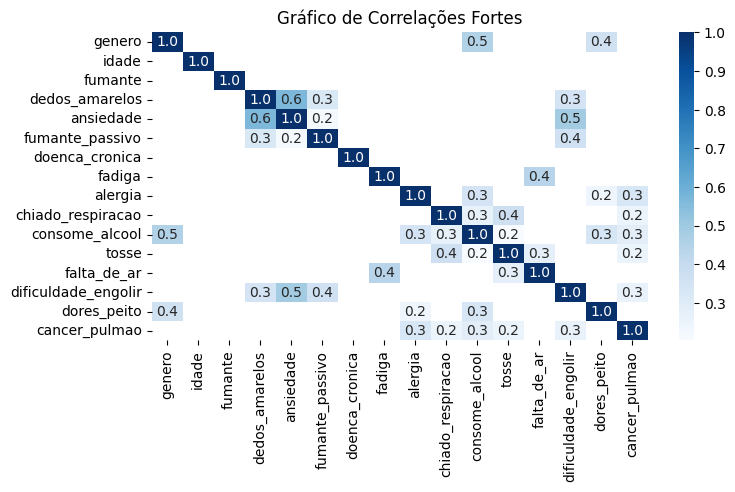

In [ ]:
# Correlação entre as variáveis do dataset

# processando a base
base_correlacao = df.copy()
base_correlacao['genero'] = base_correlacao['genero'].map({"Masculino":1, "Feminino":0})
base_correlacao['fumante'] = base_correlacao['fumante'].map({"Sim":1, "Não":0})
base_correlacao['dedos_amarelos'] = base_correlacao['dedos_amarelos'].map({"Sim":1, "Não":0})
base_correlacao['ansiedade'] = base_correlacao['ansiedade'].map({"Sim":1, "Não":0})
base_correlacao['fumante_passivo'] = base_correlacao['fumante_passivo'].map({"Sim":1, "Não":0})
base_correlacao['doenca_cronica'] = base_correlacao['doenca_cronica'].map({"Sim":1, "Não":0})
base_correlacao['fadiga'] = base_correlacao['fadiga'].map({"Sim":1, "Não":0})
base_correlacao['alergia'] = base_correlacao['alergia'].map({"Sim":1, "Não":0})
base_correlacao['chiado_respiracao'] = base_correlacao['chiado_respiracao'].map({"Sim":1, "Não":0})
base_correlacao['consome_alcool'] = base_correlacao['consome_alcool'].map({"Sim":1, "Não":0})
base_correlacao['tosse'] = base_correlacao['tosse'].map({"Sim":1, "Não":0})
base_correlacao['falta_de_ar'] = base_correlacao['falta_de_ar'].map({"Sim":1, "Não":0})
base_correlacao['dificuldade_engolir'] = base_correlacao['dificuldade_engolir'].map({"Sim":1, "Não":0})
base_correlacao['dores_peito'] = base_correlacao['dores_peito'].map({"Sim":1, "Não":0})
base_correlacao['cancer_pulmao'] = base_correlacao['cancer_pulmao'].map({"Sim":1, "Não":0})

correlacao = base_correlacao.corr()

# Filtrando os maiores correlações acima de 0.2
maior_corr = np.where(correlacao > 0.2, correlacao, np.nan)

# Gerando gráfico de correlações fortes
plt.figure(figsize=(8,4), dpi=100)
sns.heatmap(maior_corr, cmap='Blues', annot=True, fmt='.1f',
            xticklabels=correlacao.columns, yticklabels=correlacao.columns)
plt.title('Gráfico de Correlações Fortes')
plt.show()

- **Ansiedade e Dedos Amarelos** têm correlações moderadas com várias outras variáveis, o que pode indicar uma associação mais forte com outros sintomas.
- **Fumante e Fumante Passivo** têm correlações fracas com a maioria das outras variáveis, exceto por algumas associações moderadas com ansiedade e dedos amarelos.
- Consome Álcool** tem uma correlação moderada com várias variáveis, sugerindo que o consumo de álcool pode estar associado a diferentes sintomas respiratórios e comportamentais.
- **Fadiga e Dificuldade em Engolir** também mostram correlações moderadas a fortes com outras variáveis, indicando que esses sintomas estão mais fortemente associados a condições como ansiedade e dificuldades respiratórias.

### Distribuição de Idades

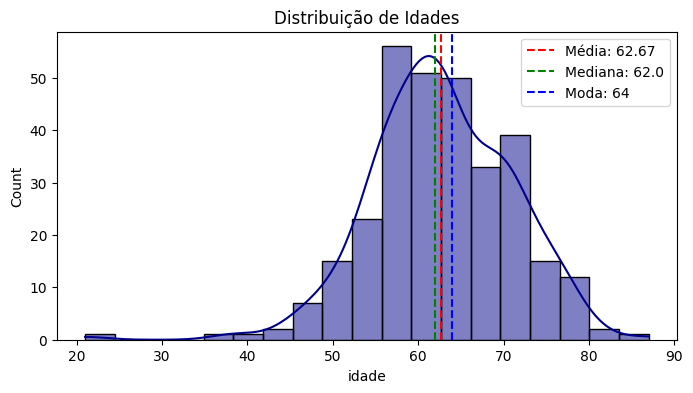

In [ ]:
# Visualizando histograma com média e mediana de idades
idade_media = df['idade'].mean()
idade_mediana = df['idade'].median()
idade_moda = sts.mode(df['idade'])

plt.figure(figsize=(8,4), dpi=100)
sns.histplot(x=df['idade'], kde=True, color='darkblue')
plt.axvline(idade_media, color='red', linestyle='dashed', linewidth=1.5, label=f'Média: {round(idade_media,2)}')
plt.axvline(idade_mediana, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana: {round(idade_mediana,2)}')
plt.axvline(idade_moda, color='blue', linestyle='dashed', linewidth=1.5, label=f'Moda: {round(idade_moda,2)}')
plt.legend()
plt.title('Distribuição de Idades')
plt.show()

Como ja visto anteriormente, mas agora em um gráfico histograma existe uma variação entre as idades, com uma média e mediana em torno de 62 anos e moda em 64, mostrando que de fato a maior parte da população da base de dados está na faixa dos 60 anos. Além disso, podemos visualizar uma distribuição normal, embora levemente deslocada para a esquerda a média, mediana e a moda estam relativamente centralizadas no meio da distribuição, caracterizando uma distribuição normal.

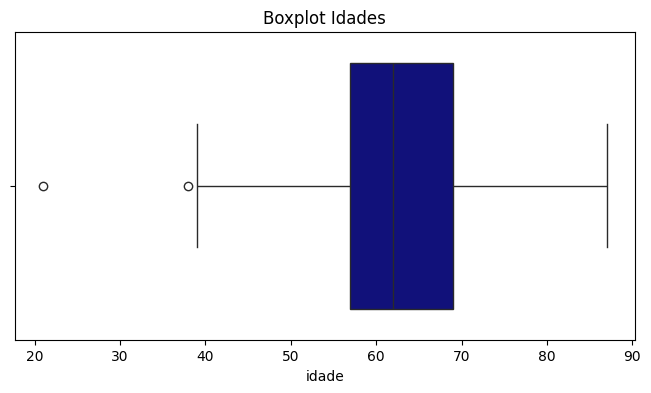

In [ ]:
# Visualizando o boxplot, identificando a vairação das idades
plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(x=df['idade'], color='darkblue')
plt.title('Boxplot Idades')
plt.show()

O boxplot das idades mostra a distribuição central e a dispersão dos dados. A mediana está próxima dos 60 anos, indicando que metade dos indivíduos têm menos de 60 anos e a outra metade mais. A maioria das idades está entre 50 e 70 anos (quartis), com poucos outliers abaixo dos 40 anos. Não há outliers significativos acima de 80 anos. A distribuição é ligeiramente assimétrica à esquerda, confirmando a predominância de indivíduos mais velhos, com uma faixa etária concentrada em torno dos 60 anos. Esse padrão é consistente com uma população predominantemente de meia-idade a idosos.

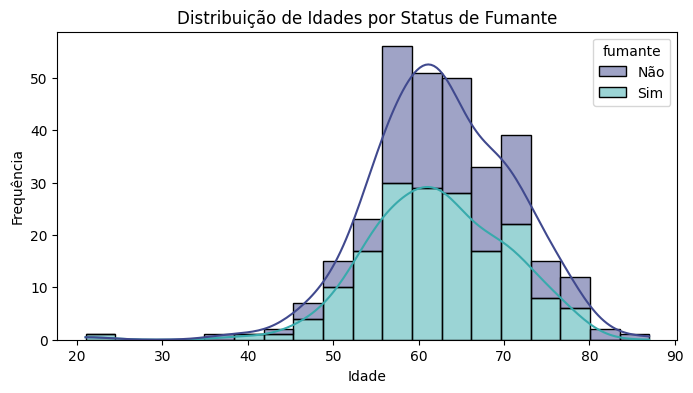

In [ ]:
# Distribuição de Idades por Status de Fumante
plt.figure(figsize=(8,4))
sns.histplot(x='idade', hue='fumante', data=df, kde=True, multiple='stack', palette='mako')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades por Status de Fumante')
plt.show()

O gráfico mostra a distribuição de idades de fumantes e não fumantes, as idades estam variando de 21 a 87 anos. Podemos perceber que há mais não fumantes em cada faixa etária comparado aos fumantes, destaca-se a faixa etária entre 50 à 70 anos, não fumantes têm picos de frequência em idades mais jovens, enquanto fumantes têm picos mais distribuídos.

In [ ]:
# Hipótese: Idade não influencia no desenvolvimento de câncer de pulmão
dados = df.copy()

dados['cancer_pulmao'] = dados['cancer_pulmao'].map({'Sim': 1, 'Não': 0})

idade = sm.add_constant(dados['idade'])
modelo = sm.OLS(dados['cancer_pulmao'], idade)
resultado = modelo.fit()

p_valor = resultado.pvalues['idade']
ic = resultado.conf_int().loc['idade']

if p_valor > 0.05:
  print(f'A hipótese é nula, a idade não tem ligação no desenvolvimento de câncer de pulmão \nconforme os resultados: \n- Valor-p é de {p_valor:.10f} \n- Intervalo de confiança de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos.')
else:
  print(f'Hipótese nula rejeitada, o valor-p é de {p_valor:.10f} \ne o intervalo de confiança é de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos.\nIndicando que a idade influência sim nas chances de desenvolver câncer.')

A hipótese é nula, a idade não tem ligação no desenvolvimento de câncer de pulmão 
conforme os resultados: 
- Valor-p é de 0.1165504293 
- Intervalo de confiança de -0.00 | 0.01 em 95% dos casos.


Não é possível afirmar que a idade tem uma influência significativa no desenvolvimento de câncer de pulmão. A hipótese nula de que a idade não influencia o desenvolvimento de câncer de pulmão não foi rejeitada, e o intervalo de confiança sugere que qualquer efeito da idade seria muito pequeno.

### Análise das variáveis categóricas

In [ ]:
def grafico_comparativo(variavel: str, hue: str, base, ticklabels: list, title: str, labels: list) -> None:
  '''Função para geração dos gráficos de comparação entre as variáveis.'''
  plt.figure(figsize=(8,4), dpi=100)
  ax = sns.countplot(x=variavel, hue=hue, data=base, palette='mako')
  ax.set_xticks(['Não','Sim'])
  ax.set_xticklabels([ticklabels[0], ticklabels[1]])
  ax.bar_label(ax.containers[0], fontsize=10)
  ax.bar_label(ax.containers[1], fontsize=10)
  plt.title(title)
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.show()

  return None

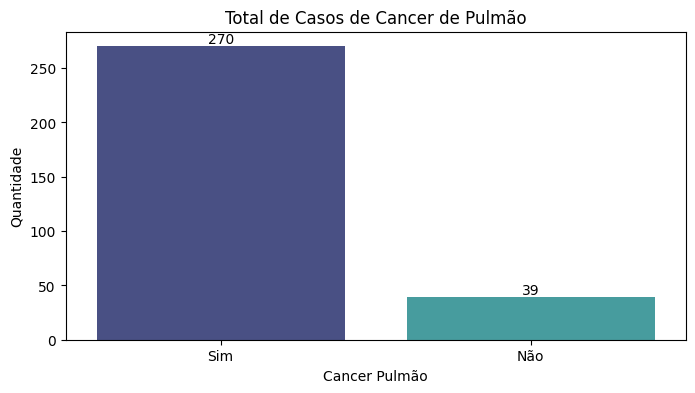

In [ ]:
# Total de Casos de Cancer de Pulmão
variavel = 'cancer_pulmao'
hue = 'cancer_pulmao'
ticklabels = ['Não', 'Sim']
title = 'Total de Casos de Cancer de Pulmão'
labels = ['Cancer Pulmão', 'Quantidade']

grafico_comparativo(variavel, hue, df, ticklabels, title, labels)

O gráfico de barras mostra a distribuição de casos de câncer de pulmão na amostra. A maioria dos indivíduos (Sim) foi diagnosticada com câncer de pulmão, enquanto um número significativamente menor (Não) não foi diagnosticado. Isso indica uma alta prevalência de câncer de pulmão na amostra estudada, com 270 casos positivos em comparação com 39 negativos.

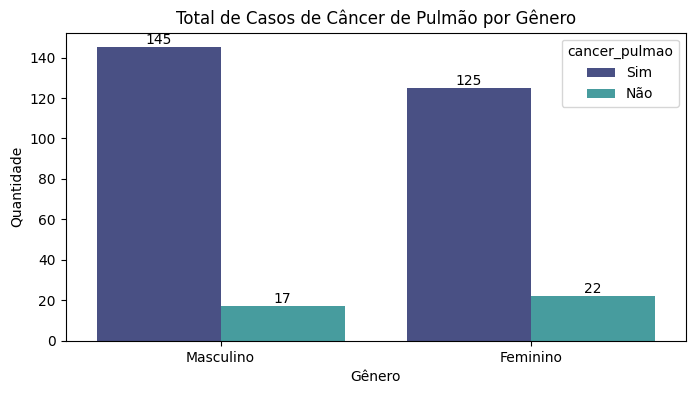

In [ ]:
# Total de Casos de Câncer de Pulmão por Gênero
plt.figure(figsize=(8,4), dpi=100)
ax = sns.countplot(x='genero', hue='cancer_pulmao', data=df, palette='mako')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Total de Casos de Câncer de Pulmão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

A análise do gráfico revela que tanto homens quanto mulheres têm um número significativo de casos de câncer de pulmão, com os homens apresentando um número ligeiramente maior. A diferença entre os casos com e sem câncer é bastante pronunciada em ambos os gêneros.

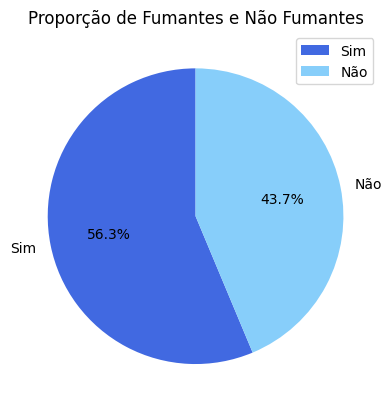

In [ ]:
# Proporções de indivíduos fumantes e não fumantes
df['fumante'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#4169E1', '#87CEFA'])
plt.title('Proporção de Fumantes e Não Fumantes')
plt.ylabel("")
plt.legend(loc='upper right')
plt.show()

A análise revela que a maioria da população representada no gráfico é composta por fumantes, com uma proporção de 56.3%, enquanto 43.7% são não fumantes. Isso indica uma diferença entre os dois grupos, mas mantem a proporção equilibrada.

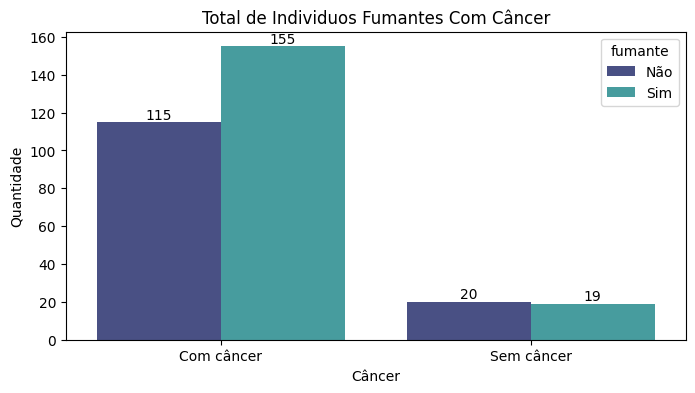

In [ ]:
# Total de Individuos Fumantes Com Câncer
variavel = 'cancer_pulmao'
hue = 'fumante'
ticklabels = ['Sem câncer', 'Com câncer']
title = 'Total de Individuos Fumantes Com Câncer'
labels = ['Câncer', 'Quantidade']

grafico_comparativo(variavel, hue, df, ticklabels, title, labels)

O gráfico sugere que há uma maior prevalência de fumantes entre os indivíduos com câncer em comparação com aqueles sem câncer. Isso pode indicar uma correlação entre o tabagismo e o desenvolvimento de câncer.

In [ ]:
# Hipótese: Fumar não causa câncer de pulmão

dados = df.copy()

dados['fumante'] = dados['fumante'].map({'Sim': 1, 'Não': 0})
dados['cancer_pulmao'] = dados['cancer_pulmao'].map({'Sim': 1, 'Não': 0})

fumante = sm.add_constant(dados['fumante'])
modelo = sm.OLS(dados['cancer_pulmao'], fumante)
resultado = modelo.fit()

p_valor = resultado.pvalues['fumante']
ic = resultado.conf_int().loc['fumante']

if p_valor > 0.05:
  print(f'A hipótese é nula, ser fumante não influencia no desenvolvimento de câncer de pulmão, o teste apresenta os valores: \n- Valor-p é de {p_valor:.10f} \n- Intervalo de confiança é de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos.')
else:
  print(f'Hipótese nula rejeitada, o valor-p é de {p_valor:.10f} \ne o intervalo de confiança é de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos.\nIndicando que fumar pode causar câncer de pulmão.')

A hipótese é nula, ser fumante não influencia no desenvolvimento de câncer de pulmão, o teste apresenta os valores: 
- Valor-p é de 0.3080081864 
- Intervalo de confiança é de -0.04 | 0.11 em 95% dos casos.


Embora um censu comum na relação entre fumar e o câncer de pulmão, os resultados não são estatisticamente significativos. Portanto, com base neste teste específico, não podemos afirmar com certeza que fumar causa câncer de pulmão.

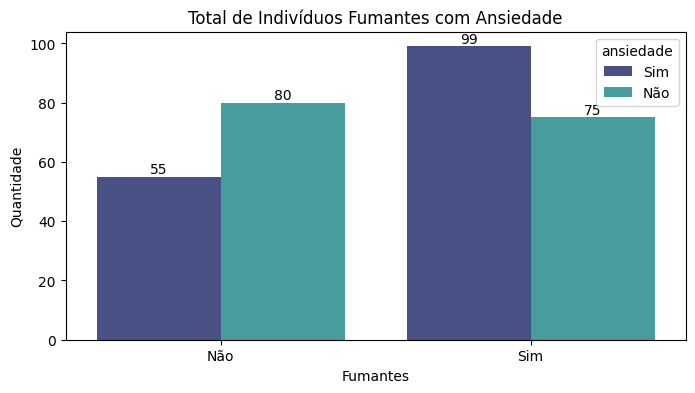

In [ ]:
# Total de Indivíduos Fumantes com ansiedade
variavel = 'fumante'
hue = 'ansiedade'
ticklabels = ['Não', 'Sim']
title = 'Total de Indivíduos Fumantes com Ansiedade'
labels = ['Fumantes', 'Quantidade']

grafico_comparativo(variavel, hue, df, ticklabels, title, labels)

A análise sugere que há uma maior prevalência de ansiedade entre os fumantes em comparação com os não fumantes. Isso pode indicar uma possível correlação entre o hábito de fumar e a presença de ansiedade.

In [ ]:
# Hipótese: Fumantes tendem a não ter ansiedade

dados = df.copy()

dados['ansiedade'] = dados['ansiedade'].map({'Sim': 1, 'Não': 0})
dados['fumante'] = dados['fumante'].map({'Sim': 1, 'Não': 0})

ansiedade = sm.add_constant(dados['ansiedade'])
modelo = sm.OLS(dados['fumante'], ansiedade)
resultado = modelo.fit()

p_valor = resultado.pvalues['ansiedade']
ic = resultado.conf_int().loc['ansiedade']

if p_valor > 0.05:
  print(f'A hipótese é nula, ser fumante não tem influencia na ansiedade, conforme os resultados: \n- Valor-p de {p_valor:.10f} \n- Intervalo de confiança de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos.')
else:
  print(f'Hipótese nula rejeitada, indicando que fumantes tem quadro de ansiedade, conforme os resultados: \n- Valor-p de {p_valor:.10f} \n- Intervalo de confiança de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos')

Hipótese nula rejeitada, indicando que fumantes tem quadro de ansiedade, conforme os resultados: 
- Valor-p de 0.0047414194 
- Intervalo de confiança de 0.05 | 0.27 em 95% dos casos


Em resumo, os dados indicam que fumantes têm uma maior probabilidade de apresentar ansiedade em comparação com não fumantes.

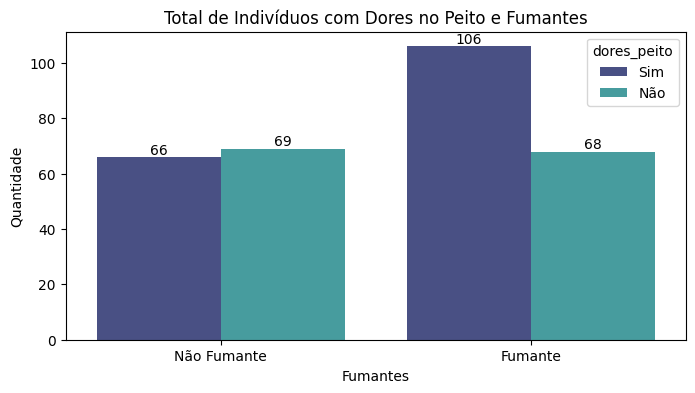

In [ ]:
# Total de Indivíduos com Dores no Peito e Fumantes
variavel = 'fumante'
hue = 'dores_peito'
ticklabels = ['Não Fumante', 'Fumante']
title = 'Total de Indivíduos com Dores no Peito e Fumantes'
labels = ['Fumantes', 'Quantidade']

grafico_comparativo(variavel, hue, df, ticklabels, title, labels)

A análise sugere que há uma maior incidência de dores no peito entre os fumantes em comparação com os não fumantes. Isso pode indicar uma correlação entre o hábito de fumar e a ocorrência de dores no peito.

In [ ]:
# Hipótese: Ser fumante não indica dores no peito

dados = df.copy()

dados['dores_peito'] = dados['dores_peito'].map({'Sim': 1, 'Não': 0})
dados['fumante'] = dados['fumante'].map({'Sim': 1, 'Não': 0})

dores_peito = sm.add_constant(dados['dores_peito'])
modelo = sm.OLS(dados['fumante'], dores_peito)
resultado = modelo.fit()

p_valor = resultado.pvalues['dores_peito']
ic = resultado.conf_int().loc['dores_peito']

if p_valor > 0.05:
  print(f'A hipótese é nula, ser fumante não tem ligação nas dores no peito, conforme os resultados: \n- Valor-p de {p_valor:.10f} \n- Intervalo de confiança de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos.')
else:
  print(f'Hipótese nula rejeitada, indicando que fumantes tem quadro de dores no peito, conforme os resultados: \n- Valor-p de {p_valor:.10f} \n- Intervalo de confiança de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos')

Hipótese nula rejeitada, indicando que fumantes tem quadro de dores no peito, conforme os resultados: 
- Valor-p de 0.0348099738 
- Intervalo de confiança de 0.01 | 0.23 em 95% dos casos


Esses resultados reforçam a conclusão de que fumar está associado a um aumento na ocorrência de dores no peito.

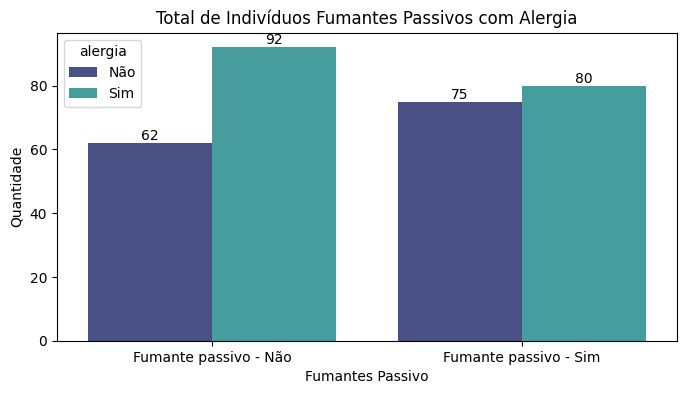

In [ ]:
# Total de Indivíduos Fumantes Passivos com Alergia
variavel = 'fumante_passivo'
hue = 'alergia'
fumante = ['Fumante passivo - Não', 'Fumante passivo - Sim']
title = 'Total de Indivíduos Fumantes Passivos com Alergia'
labels = ['Fumantes Passivo', 'Quantidade']

grafico_comparativo(variavel, hue, df, fumante, title, labels)

A análise do gráfico sugere que há uma maior incidência de alergias entre os fumantes passivos em comparação com os não fumantes passivos. No entanto, a diferença não é muito grande, indicando que outros fatores também podem estar contribuindo para a ocorrência de alergias.

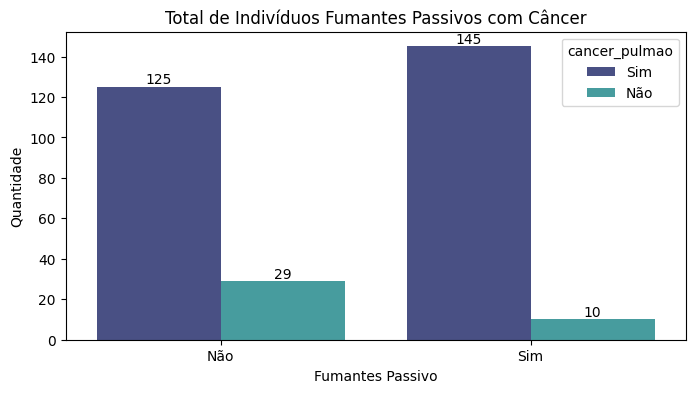

In [ ]:
# Total de Indivíduos Fumantes Passivos com Câncer
variavel = 'fumante_passivo'
hue = 'cancer_pulmao'
fumante = ['Não', 'Sim']
title = 'Total de Indivíduos Fumantes Passivos com Câncer'
labels = ['Fumantes Passivo', 'Quantidade']

grafico_comparativo(variavel, hue, df, fumante, title, labels)

O gráfico nos mostra que há uma maior incidência de câncer de pulmão entre os fumantes passivos em comparação com os não fumantes passivos. Isso destaca os riscos associados ao fumo passivo.

In [ ]:
# Hipótese: Fumantes passivos tendem a não desenvolver câncer

dados = df.copy()

dados['fumante_passivo'] = dados['fumante_passivo'].map({'Sim': 1, 'Não': 0})
dados['cancer_pulmao'] = dados['cancer_pulmao'].map({'Sim': 1, 'Não': 0})

fumante_passivo = sm.add_constant(dados['fumante_passivo'])
modelo = sm.OLS(dados['cancer_pulmao'], fumante_passivo)
resultado = modelo.fit()

p_valor = resultado.pvalues['fumante_passivo']
ic = resultado.conf_int().loc['fumante_passivo']

if p_valor > 0.05:
  print(f'A hipótese é nula, ser fumante passivo não tem ligação a desenvolvimento de cânce de pulmão, conforme os resultados: \n- Valor-p de {p_valor:.10f} \n- Intervalo de confiança de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos.')
else:
  print(f'Hipótese nula rejeitada, indicando que fumantes passivos tem quadro de desenvolvimento de câncer de pulmão, conforme os resultados: \n- Valor-p de {p_valor:.10f} \n- Intervalo de confiança de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos')

Hipótese nula rejeitada, indicando que fumantes passivos tem quadro de desenvolvimento de câncer de pulmão, conforme os resultados: 
- Valor-p de 0.0009947363 
- Intervalo de confiança de 0.05 | 0.20 em 95% dos casos


Esses resultados reforçam a conclusão de que o fumo passivo está associado a um risco aumentado de câncer de pulmão.

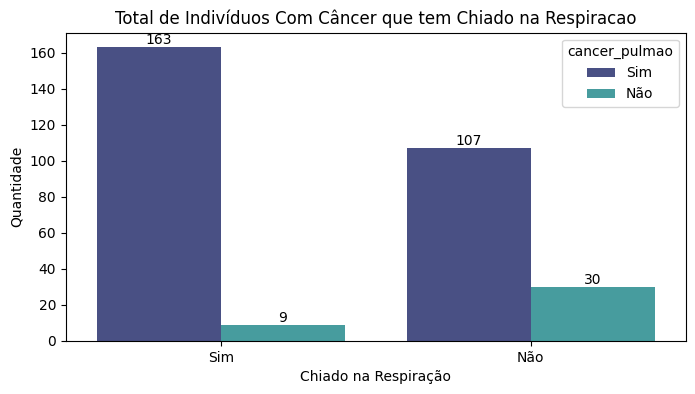

In [ ]:
# Total de Indivíduos Com Câncer que tem Chiado na Respiracao
variavel = 'chiado_respiracao'
hue = 'cancer_pulmao'
fumante = ['Não', 'Sim']
title = 'Total de Indivíduos Com Câncer que tem Chiado na Respiracao'
labels = ['Chiado na Respiração', 'Quantidade']

grafico_comparativo(variavel, hue, df, fumante, title, labels)

A análise sugere que uma maior proporção de indivíduos com câncer de pulmão apresenta chiado na respiração em comparação com aqueles sem câncer de pulmão. Isso pode indicar que o chiado na respiração é um sintoma mais comum entre os pacientes com câncer de pulmão.

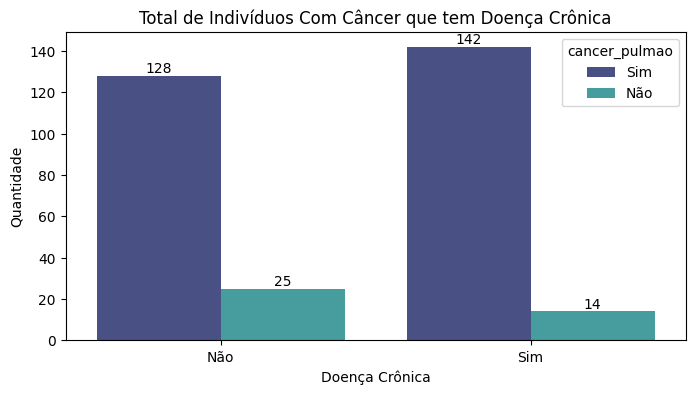

In [ ]:
# Total de Indivíduos Com Câncer que tem Doença Crônica
variavel = 'doenca_cronica'
hue = 'cancer_pulmao'
fumante = ['Não', 'Sim']
title = 'Total de Indivíduos Com Câncer que tem Doença Crônica'
labels = ['Doença Crônica', 'Quantidade']

grafico_comparativo(variavel, hue, df, fumante, title, labels)

A análise sugere que há uma maior proporção de indivíduos com câncer que também possuem uma doença crônica em comparação com aqueles sem câncer. Isso pode indicar uma correlação entre a presença de doenças crônicas e o desenvolvimento de câncer.

In [ ]:
# Hipótese: Doenças crônicas não tem relação com desenvolver câncer

dados = df.copy()

dados['doenca_cronica'] = dados['doenca_cronica'].map({'Sim': 1, 'Não': 0})
dados['cancer_pulmao'] = dados['cancer_pulmao'].map({'Sim': 1, 'Não': 0})

doenca_cronica = sm.add_constant(dados['doenca_cronica'])
modelo = sm.OLS(dados['cancer_pulmao'], doenca_cronica)
resultado = modelo.fit()

p_valor = resultado.pvalues['doenca_cronica']
ic = resultado.conf_int().loc['doenca_cronica']

if p_valor > 0.05:
  print(f'A hipótese é nula, doenças crônicas não tem ligação a desenvolvimento de cânce de pulmão, \nconforme os resultados: \n- Valor-p de {p_valor:.10f} \n- Intervalo de confiança de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos.')
else:
  print(f'Hipótese nula rejeitada, doenças crônicas tem relação em quadros de desenvolvimento de câncer de pulmão, \nconforme os resultados: \n- Valor-p de {p_valor:.10f} \n- Intervalo de confiança de {ic[0]:.2f} | {ic[1]:.2f} em 95% dos casos')

A hipótese é nula, doenças crônicas não tem ligação a desenvolvimento de cânce de pulmão, 
conforme os resultados: 
- Valor-p de 0.0514871193 
- Intervalo de confiança de -0.00 | 0.15 em 95% dos casos.


Esses resultados indicam que, com base nos dados fornecidos, não há uma associação significativa entre ter uma doença crônica e o desenvolvimento de câncer de pulmão.

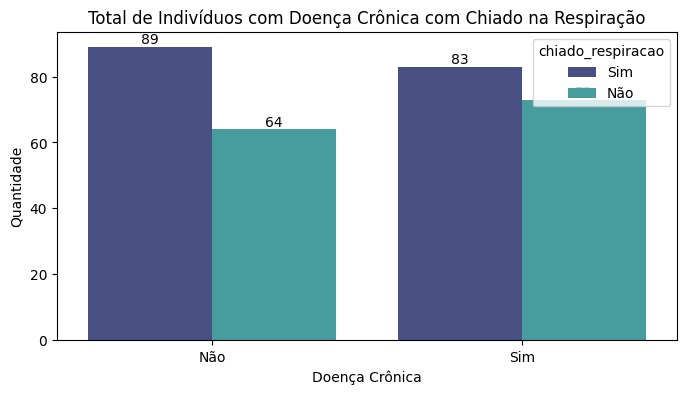

In [ ]:
# Total de Indivíduos com Doença Crônica com Chiado na Respiração
variavel = 'doenca_cronica'
hue = 'chiado_respiracao'
fumante = ['Não', 'Sim']
title = 'Total de Indivíduos com Doença Crônica com Chiado na Respiração'
labels = ['Doença Crônica', 'Quantidade']

grafico_comparativo(variavel, hue, df, fumante, title, labels)

A análise sugere que a maioria dos indivíduos, tanto com quanto sem doença crônica, não apresenta chiado na respiração. No entanto, há uma quantidade significativa de indivíduos com doença crônica que apresentam chiado na respiração, o que pode indicar uma correlação entre doenças crônicas e problemas respiratórios.

# **Machine Learning**

### Pré processamento dos dados

No pré processamento dos dados foi aplicado o método LabelEncoder que converte categorias em números inteiros. Cada categoria é mapeada para um número único, útil para variáveis ordinais onde a ordem importa. Esses método nos ajuda a transformar dados categóricos em um formato que pode ser utilizado por algoritmos de machine learning, melhorando a precisão e a eficiência dos modelos preditivos.

In [ ]:
# Aplicando Encode nas variáveis nominais
labelencod = LabelEncoder()
df['genero'] = labelencod.fit_transform(df['genero'])
df['fumante'] = labelencod.fit_transform(df['fumante'])
df['dedos_amarelos'] = labelencod.fit_transform(df['dedos_amarelos'])
df['ansiedade'] = labelencod.fit_transform(df['ansiedade'])
df['fumante_passivo'] = labelencod.fit_transform(df['fumante_passivo'])
df['doenca_cronica'] = labelencod.fit_transform(df['doenca_cronica'])
df['fadiga'] = labelencod.fit_transform(df['fadiga'])
df['alergia'] = labelencod.fit_transform(df['alergia'])
df['chiado_respiracao'] = labelencod.fit_transform(df['chiado_respiracao'])
df['consome_alcool'] = labelencod.fit_transform(df['consome_alcool'])
df['tosse'] = labelencod.fit_transform(df['tosse'])
df['falta_de_ar'] = labelencod.fit_transform(df['falta_de_ar'])
df['dificuldade_engolir'] = labelencod.fit_transform(df['dificuldade_engolir'])
df['dores_peito'] = labelencod.fit_transform(df['dores_peito'])
df['cancer_pulmao'] = labelencod.fit_transform(df['cancer_pulmao'])

In [ ]:
# Base pré processada
df.head()

,genero,idade,fumante,dedos_amarelos,ansiedade,fumante_passivo,doenca_cronica,fadiga,alergia,chiado_respiracao,consome_alcool,tosse,falta_de_ar,dificuldade_engolir,dores_peito,cancer_pulmao
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


Após o pré processamento dos dados temos uma base preparada para ser usada em um algoritmo de machine learning.

### Balanceando a base de dados

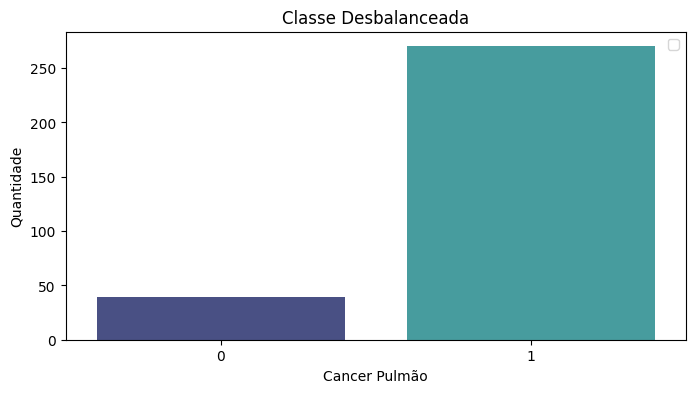

In [ ]:
# Visualizando Distribuição dos dados da variável classificadora desbalanceados
plt.figure(figsize=(8,4), dpi=100)
ax = sns.countplot(x='cancer_pulmao', hue='cancer_pulmao', data=df, palette='mako')
plt.title('Classe Desbalanceada')
plt.xlabel('Cancer Pulmão')
plt.ylabel('Quantidade')
plt.legend('')
plt.show()

Conforme o gráfico acima, podemos observar que as classes estão desbalanceadas, então vamos aplicar a tecnica de **resemple** do **sklearn** para gerar uma base balanceada.

In [ ]:
# Isolando as classes da coluna alvo
status_0 = df[df['cancer_pulmao'] == 0]
status_1 = df[df['cancer_pulmao'] == 1]

In [ ]:
# Observando as dimensões
status_0.shape, status_1.shape

((39, 16), (270, 16))

In [ ]:
# Criando variável de números de amostras
n_status_1 = len(status_1)
n_status_1

270

In [ ]:
# Criando amostras balanceadas
base_balanceada = resample(status_0, replace=True, n_samples=n_status_1, random_state=1)

In [ ]:
# Criando base balanceada
nova_base = pd.concat([status_1, base_balanceada])

In [ ]:
# Dimensões da nova base
nova_base.shape

(540, 16)

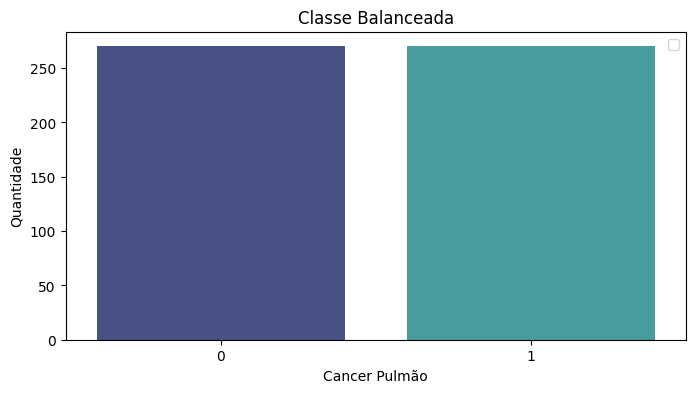

In [ ]:
# Visualizando Distribuição dos dados da variável classificadora balanceados
plt.figure(figsize=(8,4), dpi=100)
ax = sns.countplot(x='cancer_pulmao', hue='cancer_pulmao', data=nova_base, palette='mako')
plt.title('Classe Balanceada')
plt.xlabel('Cancer Pulmão')
plt.ylabel('Quantidade')
plt.legend('')
plt.show()

A base inicial era altamente desbalanceada, com 270 casos positivos de câncer de pulmão (valor 1) e apenas 39 negativos (valor 0). Para equilibrar a base, foi aplicado o método de reamostragem (resample), aumentando o número de casos negativos para 270, igualando as classes. Isso resulta em uma base balanceada com 540 registros, essencial para evitar que o modelo aprenda com viés.

### Divisão da base em treino e teste

O dataset foi dividido em conjuntos de treino e teste com uma proporção de 70% para treino e 30% para teste.
Em machine learning, a base de treino e teste é uma prática fundamental para avaliar a performance de um modelo preditivo.

In [ ]:
# Base de atributos previsores
X = nova_base.iloc[:,0:15]
X.shape

(540, 15)

In [ ]:
# Base dos atributos classificadores
y = nova_base['cancer_pulmao']
y.shape

(540,)

In [ ]:
# Divisão em teste e treino
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
# Dimensões base de treino
X_treino.shape, y_treino.shape

((378, 15), (378,))

In [ ]:
# Dimensões base de teste
X_teste.shape, y_teste.shape

((162, 15), (162,))

A base de dados balanceada foi dividida em conjuntos de treino (70%) e teste (30%). O conjunto de treino contém 378 registros, enquanto o conjunto de teste contém 162 registros. Essa divisão é crucial para avaliar o desempenho do modelo em dados que ele não viu durante o treinamento.

### Criando o modelo e treinando

In [ ]:
# Criando modelo
rf = RandomForestClassifier(random_state=100)

# Treinando o modelo
rf.fit(X_treino, y_treino)

RandomForestClassifier(random_state=100)

Foi utilizado o algoritmo **RandomForestClassifier** para treinar o modelo, uma escolha comum para problemas de classificação devido à sua robustez. O modelo foi treinado udando dados de treino.

### Avaliando o modelo recem criado

Neste primeiro modelo a avaliado foi feita utilizando a métrica de acurácia, e também foram o relatórios de classificação (precision, recall, f1-score) e a matriz de confusão.

In [ ]:
# Gerando previsões do modelo
previsao = rf.predict(X_teste)

In [ ]:
# Visualizando respostas da previsão
previsao

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
# Visualizando respostas da base de teste
np.array(y_teste)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
# Calculando a acurácia
acuracia = accuracy_score(y_teste, previsao)
print('Acurácia do modelo:', acuracia)

Acurácia do modelo: 0.9753086419753086


In [ ]:
# Visualizando a tabela de reports
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        83
           1       1.00      0.95      0.97        79

    accuracy                           0.98       162
   macro avg       0.98      0.97      0.98       162
weighted avg       0.98      0.98      0.98       162



Métricas Detalhadas:
- Precision: O modelo apresentou uma precisão de 0,95 para a classe 0 e 1.00 para a classe 1.
- Recall: O recall foi de 1.00 para a classe 0 e 0,95 para a classe 1.
- F1-Score: O F1-score foi equilibrado em 0,98 para classe 0 e 0.97 para classe 1.

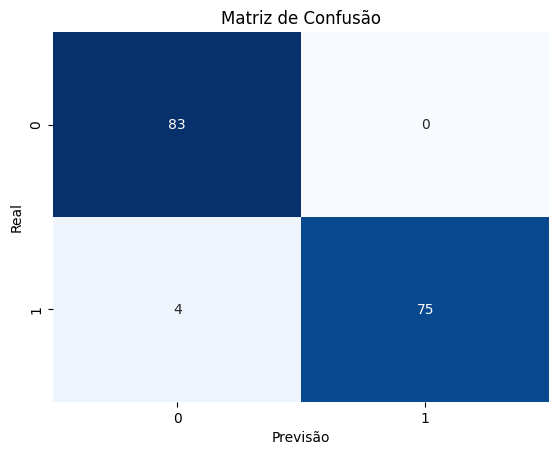

In [ ]:
# Gráfico da matriz de confusão
cm = confusion_matrix(y_teste, previsao)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

O gráfico da matriz de confusão é usado para avaliar a performance de um modelo de classificação, podemos avaliar da seguinte forma:

**Descrição da Matriz de Confusão**
- Previsão 0 / Real 0: 83 instâncias foram corretamente classificadas como 0.
- Previsão 1 / Real 1: 75 instâncias foram corretamente classificadas como 1.
- Previsão 0 / Real 1: 4 instâncias de classe 1 foram incorretamente classificadas como 0 (falsos negativos).
- Previsão 1 / Real 0: 0 instâncias de classe 0 foram incorretamente classificadas como 1 (falsos positivos).

O modelo tem uma alta taxa de acertos, com 83 verdadeiros negativos e 75 verdadeiros positivos, apenas 4 falsos negativos e nenhum falso positivo, indicando que o modelo é bastante preciso e confiável.
No geral a matriz mostra que o modelo é eficaz em distinguir entre as classes 0 e 1, com poucos erros.

### Análise de Overfitting ou Underfitting

In [ ]:
# Aplicando validação cruzada
scores = cross_val_score(rf, X, y, cv=10)

# Resultado da validação cruzada para o modelo
print(f'Resultado da acurácia validação cruzada: {scores.mean():.4f}')

# Acurácia do modelo
print(f'\nResultado da acurácia do modelo: {acuracia:.4f}')

Resultado da acurácia validação cruzada: 0.9685

Resultado da acurácia do modelo: 0.9753


A pequena diferença entre a acurácia da validação cruzada (0.9685) e a acurácia do modelo (0.9753) sugere que o modelo é consistente e generaliza bem para novos dados, ambos os valores indicam um desempenho excelente, com o modelo sendo altamente preciso na classificação dos dados. Não há evidências de overfitting ou underfitting para o modelo.

### Otimização de hiperparâmetros

Apesar de o modelo ter desempenhado quando submetido a validação cruzada, podemos melhora-lo e gerar uma maior confiança no modelo.

Por isso vamos otimizar os hiperparâmetros.

In [ ]:
# Parâmetros
parametros = {
    'criterion':['gini', 'entropy'],
    'n_estimators':[10, 50, 100, 200],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 5, 10]
}

In [ ]:
# Criando o gridsearch
grid_search = GridSearchCV(estimator=rf, param_grid=parametros, cv=5)

# Treinando o modelo
grid_search.fit(X, y)

# Melhores parâmetros
melhores_parametros = grid_search.best_params_

# Melhor acuracia
melhor_acuracia = grid_search.best_score_

# Visualiozando os resultados
print('Melhor acuracia:', melhor_acuracia)
print('Melhores parâmetros:', melhores_parametros)

Melhor acuracia: 0.9703703703703702
Melhores parâmetros: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Aplicando parâmetros para o modelo final

Agora com a melhor definição de parâmetros podemos aplicar e gerar um novo modelo onde terá previsões ainda mais confiaveis.

In [ ]:
# Criando modelo com os parâmetros definidos
modelo = RandomForestClassifier(n_estimators=200,
                                criterion='gini',
                                min_samples_split=2,
                                min_samples_leaf=1,
                                random_state=100)

modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_estimators=200, random_state=100)

### Validando modelo final

In [ ]:
# Aplicando validação cruzada
scores = cross_val_score(modelo, X, y, cv=10)

# Resultado da validação cruzada para o modelo
print(f'Resultado da acurácia validação cruzada modelo final: {scores.mean():.4f}')

# Acurácia do modelo
nova_previsao = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, nova_previsao)
print(f'\nResultado da acurácia do modelo final: {acuracia:.4f}')

Resultado da acurácia validação cruzada modelo final: 0.9685

Resultado da acurácia do modelo final: 0.9691


A pequena diferença entre a acurácia da validação cruzada (0.9685) e a acurácia do modelo final (0.9691) sugere que o modelo é consistente e generaliza bem para novos dados, além disso, ambos os valores indicam um desempenho excelente, com o modelo sendo altamente preciso na classificação dos dados.

# **Avaliando desempenho do modelo Final**

In [ ]:
# Gerando previsões do modelo final
previsao = modelo.predict(X_teste)

In [ ]:
# Visualizando a tabela de reports do modelo final
print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        83
           1       1.00      0.94      0.97        79

    accuracy                           0.97       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.97      0.97      0.97       162



- **Precision**: A precisão para a classe 0 é 0,94 e para a classe 1 é 1,00. Isso significa que o modelo é muito bom em evitar falsos positivos, especialmente para a classe 1.
- **Recall**: A revocação para a classe 0 é 1,00 e para a classe 1 é 0,94. Isso indica que o modelo é excelente em identificar todos os verdadeiros positivos para a classe 0, mas perde alguns para a classe 1.
- **F1-Score**: O F1-score, que é a média harmônica da precisão e da revocação, é 0,97 para ambas as classes, mostrando um equilíbrio muito bom entre precisão e revocação.
- **Accuracy**: A acurácia geral do modelo é 0,97, o que significa que 97% das previsões estão corretas.
- **Macro avg e Weighted avg**: Ambas as médias (macro e ponderada) para precisão, revocação e F1-score são 0,97, indicando um desempenho consistente e equilibrado do modelo em ambas as classes.

Em resumo, o modelo apresenta um desempenho excelente, com alta precisão, revocação e F1-score, além de uma acurácia geral de 97%.

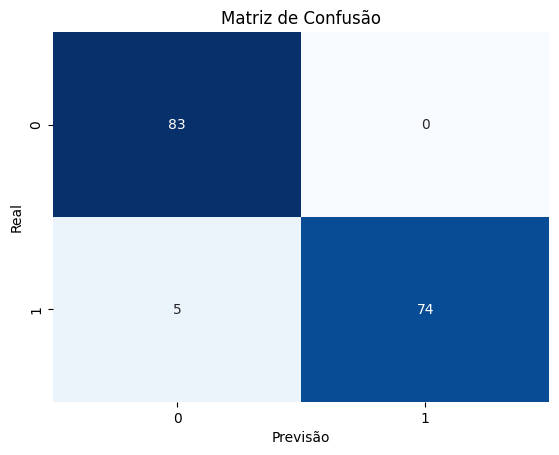

In [ ]:
# Gráfico da matriz de confusão do modelo final
cm = confusion_matrix(y_teste, previsao)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

A matriz de confusão mostra que o modelo tem um bom desempenho geral, com uma alta taxa de acertos tanto para a classe 0 quanto para a classe 1, mas ainda há alguns erros de classificação, especialmente na classe 1.

In [ ]:
# Obtendo a probabilidade de previsão na base de teste do modelo final
y_score = modelo.predict_proba(X_teste)[:,1]

# Calculo da curva ROC
fpr, tpr, _= roc_curve(y_teste, y_score)

# Calculo da área da curva
roc_auc = auc(fpr, tpr)

print('Área sob a curva ROC do modelo final:', roc_auc)

Área sob a curva ROC do modelo final: 0.9981698947689492


A Área sob a curva ROC (AUC - ROC) é uma métrica que mede a capacidade de um modelo de classificação em distinguir entre classes. Um valor de 0.998 indica que o modelo tem um desempenho excelente, quase perfeito, na distinção entre as classes positivas e negativas. Quanto mais próximo de 1, melhor o desempenho do modelo.

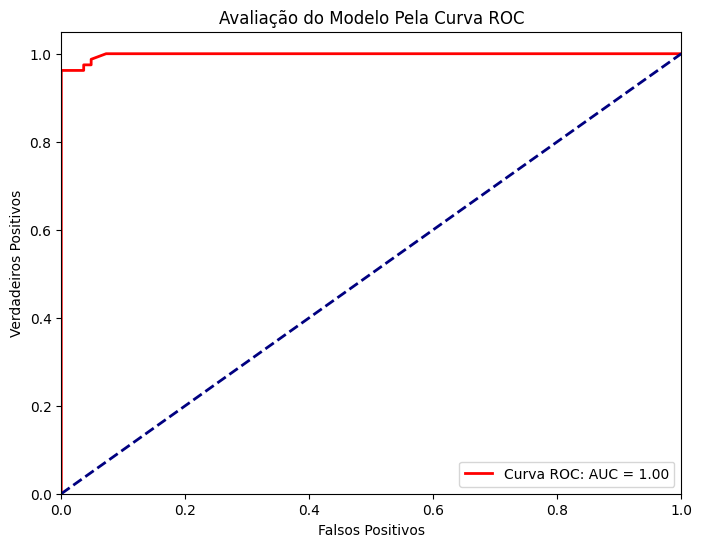

In [ ]:
# Gráfico de avaliação da curva ROC do modelo final
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='Curva ROC: AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdadeiros Positivos')
plt.title('Avaliação do Modelo Pela Curva ROC')
plt.legend(loc='lower right')
plt.show()

O gráfico mostra a **Curva ROC** (Receiver Operating Characteristic) do modelo, que é uma ferramenta para avaliar a performance de um classificador binário.

A linha vermelha da curva ROC do modelo, segue o contorno superior esquerdo do gráfico, indicando um desempenho perfeito. Área Sob a Curva a AUC é de 1.00, o que significa que o modelo tem uma capacidade perfeita de distinguir entre as classes positivas e negativas.

Em resumo, o gráfico indica que o modelo tem um desempenho excelente, com uma AUC perfeita de 1.00, que indica que ele é capaz de classificar corretamente todas as instâncias sem erros.

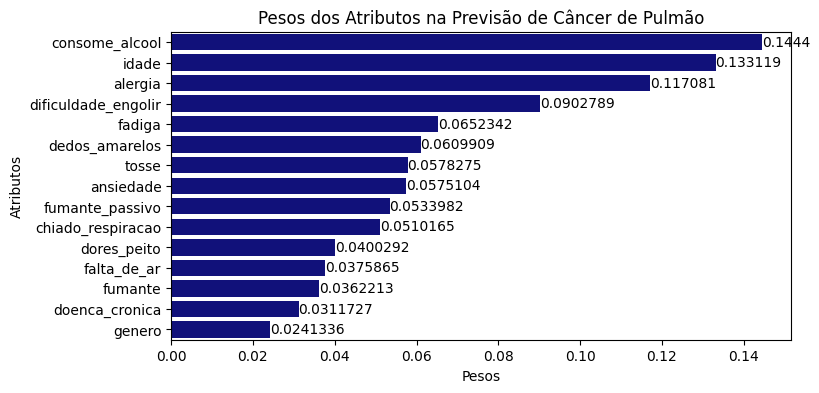

In [ ]:
# Variáveis com maiores pesos do modelo final

# Atributos
atributos = ['genero', 'idade', 'fumante', 'dedos_amarelos', 'ansiedade',
       'fumante_passivo', 'doenca_cronica', 'fadiga', 'alergia',
       'chiado_respiracao', 'consome_alcool', 'tosse', 'falta_de_ar',
       'dificuldade_engolir', 'dores_peito']

# Criando dataframe
pesos = pd.DataFrame({'Atributos': atributos, 'Pesos': modelo.feature_importances_})
pesos = pesos.sort_values('Pesos', ascending=False)
pesos = pesos.reset_index(drop=True)

# Gráfico
plt.figure(figsize=(8,4))
ax = sns.barplot(pesos, x='Pesos', y='Atributos', orient='h', color='darkblue')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Pesos dos Atributos na Previsão de Câncer de Pulmão')
plt.show()

**Os atributos mais importantes identificados no gráfico**
- **Consumo de álcool**: Peso de aproximadamente 0.1444, indicando uma forte influência na previsão.
- **Ansiedade**: Peso de aproximadamente 0.1331, também com grande impacto.
- **Dificuldade em engolir**: Peso de cerca de 0.1171, mostrando relevância significativa.

**Outros atributos relevantes**

- **Falta de ar e fumante**: Ambos com pesos menores, mas ainda importantes.
- **Doença crônica e tosse**: Contribuem de forma moderada para a previsão.

Em resumo, o gráfico destaca que fatores como consumo de álcool, ansiedade e dificuldade em engolir são os mais influentes na previsão de câncer de pulmão, de acordo com o modelo. Isso pode ser útil para direcionar esforços de prevenção e diagnóstico.

# **Conclusão**



O modelo de Random Forest atingiu uma acurácia de 96.91% atigindo a meta estabelecida para o projeto, o resultado da acurácia indica um bom desempenho na predição da presença de câncer de pulmão com base nas variáveis analisadas. O melhoramento do modelo com as definições do hiperparâmetros contribuiram para a consolidação do resultado satisfatório. A validação do modelo utilizando **Cross validation**, **Cruve ROC** e **Matrix Confusion**, nos aponta que o modelo desenvolvido neste projeto é robusto e generaliza bem para novos dados.


# FIM